#  1. Predict Calories Burn ML Competition

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Understand the Dataset

#### 2.1 Load the dataset

In [6]:
df = pd.read_csv("./train.csv")

#### 2.2 Check first few rows

In [7]:
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


#### 2.3 Basic information

In [8]:
df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


#### 2.4 Column names and Types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


#### 2.5 Rows and Columns

In [10]:
df.shape

(750000, 9)

# 3. Data Quality Checks

#### 3.1 Check for missing values

In [11]:
df.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

#### 3.2 Duplicates

In [12]:
duplicates = df[df.duplicated()]

# Count duplicate rows
duplicate_count = df.duplicated().sum()

# Remove duplicates (if needed)
df = df.drop_duplicates()

#### 3.3 Correlation

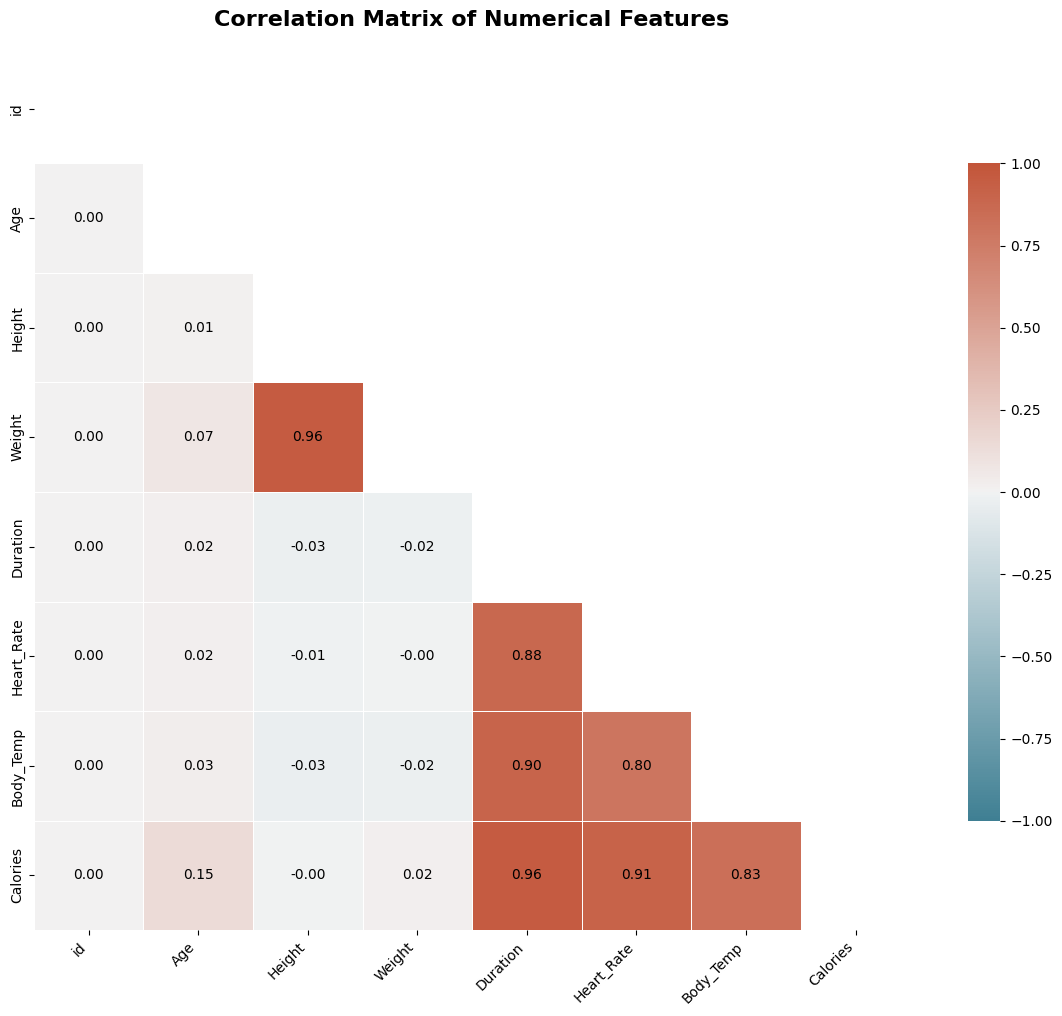

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle (to avoid duplicate info)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Choose a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    correlation_matrix, 
    mask=mask, 
    cmap=cmap, 
    vmax=1.0, 
    vmin=-1.0, 
    center=0,
    annot=True, 
    fmt=".2f", 
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .75},
    annot_kws={"size": 10, "color": "black"}
)

# Add title with better font styling
plt.title("Correlation Matrix of Numerical Features", fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Layout adjustment
plt.tight_layout()

# Show the plot
plt.show()


#### 3.4 Outliers

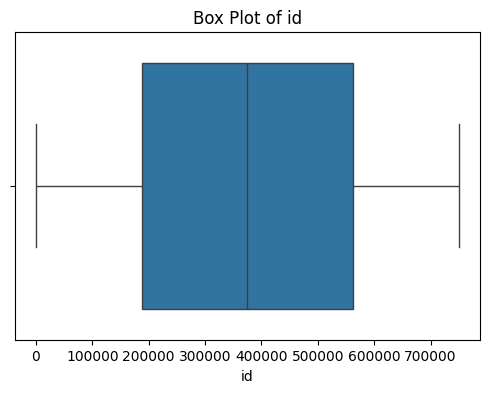

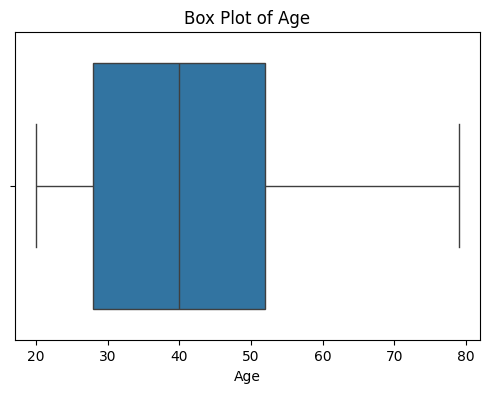

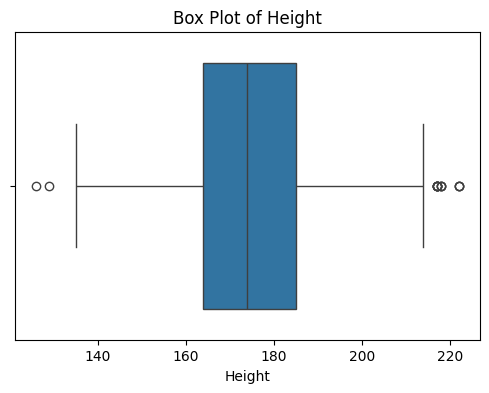

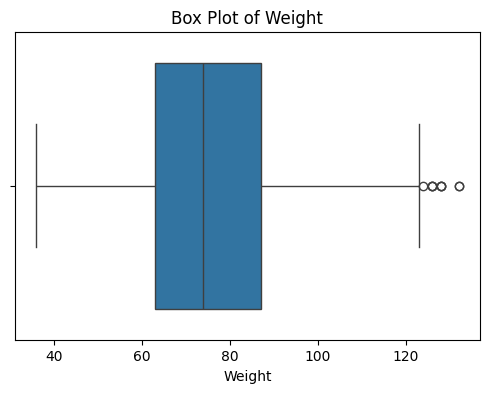

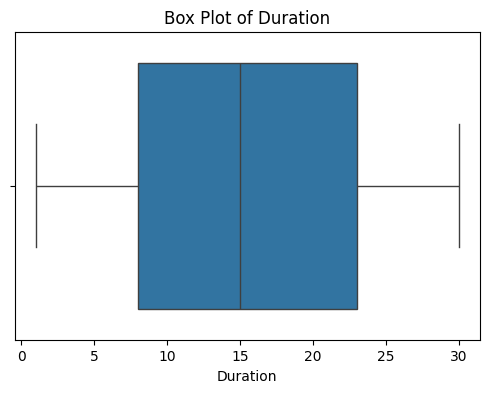

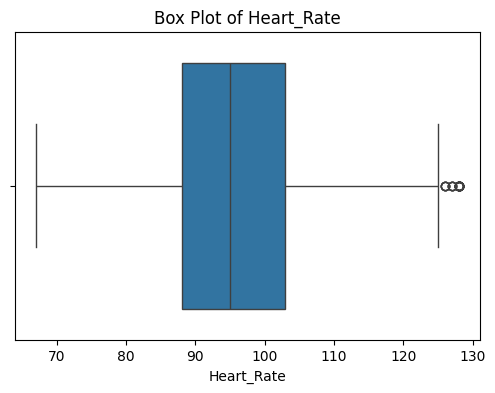

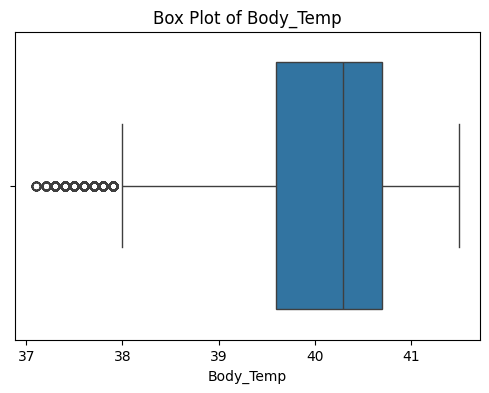

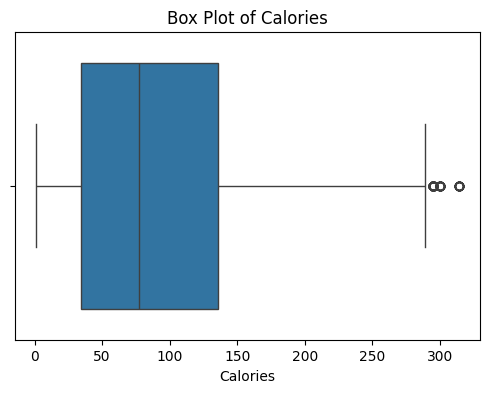

In [14]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


# 4. Univariate Analysis

In [15]:
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


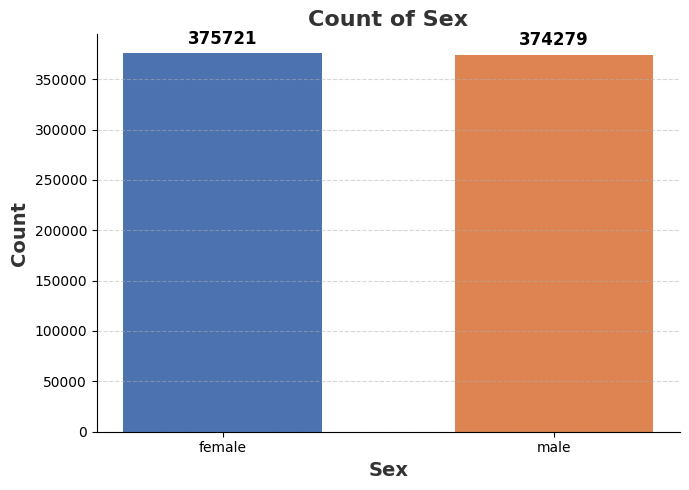

In [16]:
# Get value counts
counts = df['Sex'].value_counts()

# Set colors for each bar
colors = ['#4C72B0', '#DD8452']  # Example: blue and orange

# Create the plot
fig, ax = plt.subplots(figsize=(7, 5))
bars = ax.bar(counts.index, counts.values, color=colors, width=0.6)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 4),  # Offset label above bar
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=12, fontweight='bold')

# Aesthetic adjustments
ax.set_xlabel('Sex', fontsize=14, fontweight='bold', color='#333333')
ax.set_ylabel('Count', fontsize=14, fontweight='bold', color='#333333')
ax.set_title('Count of Sex', fontsize=16, fontweight='bold', color='#333333')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


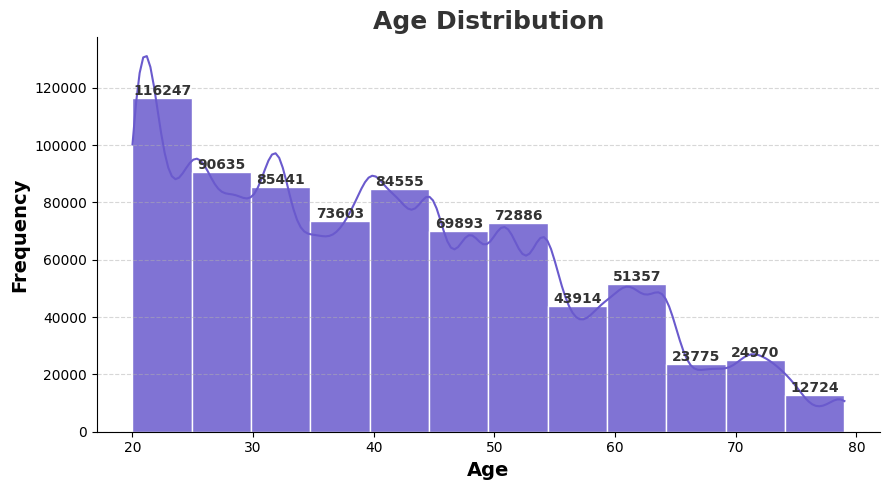

In [17]:
plt.figure(figsize=(9, 5))

sns.histplot(df['Age'], bins=12, color='#6A5ACD', edgecolor='white', alpha=0.85, kde=True)

counts, bins, patches = plt.hist(df['Age'], bins=12, color='#6A5ACD', edgecolor='white', alpha=0.0)
for count, x in zip(counts, bins):
    if count > 0:
        plt.text(x + (bins[1]-bins[0])/2, count, int(count), ha='center', va='bottom', fontsize=10, fontweight='bold', color='#333333')

plt.title('Age Distribution', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Remove top and right spines for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()


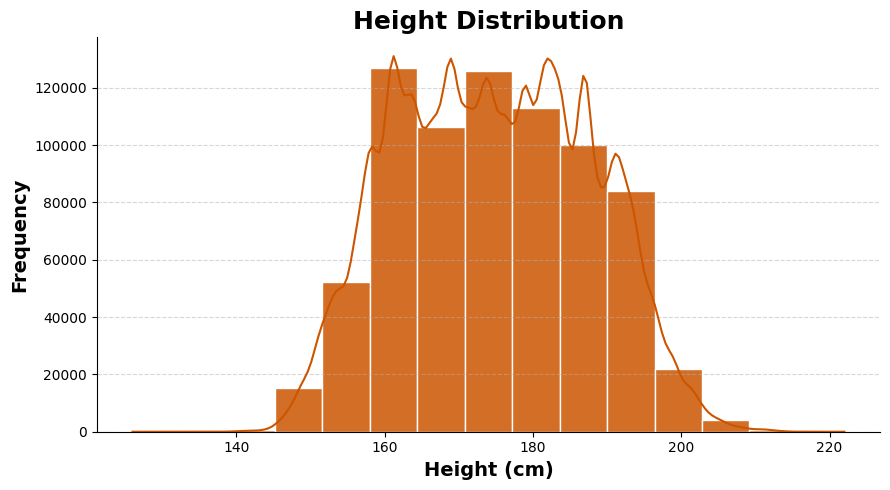

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.histplot(
    data=df, 
    x='Height', 
    bins=15, 
    color='#CC5500',  ## Burnt Orange
    edgecolor='white', 
    alpha=0.85, 
    kde=True
)

plt.title('Height Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Height (cm)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()


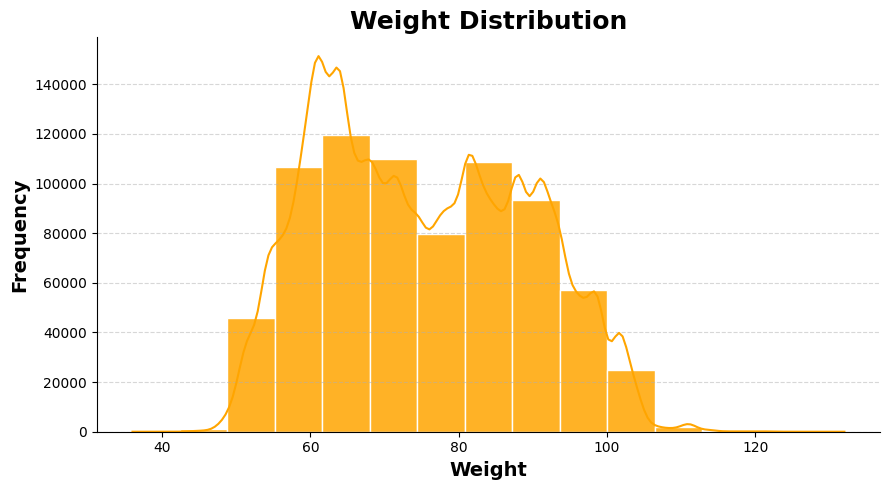

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

#FFA500
plt.figure(figsize=(9, 5))
sns.histplot(
    data=df,
    x='Weight',
    bins=15,                # Adjust bin count for detail
    color='#FFA500',        # Teal color for freshness
    edgecolor='white',
    alpha=0.85,
    kde=True                # Adds KDE curve for smoothness
)

plt.title('Weight Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Weight', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()


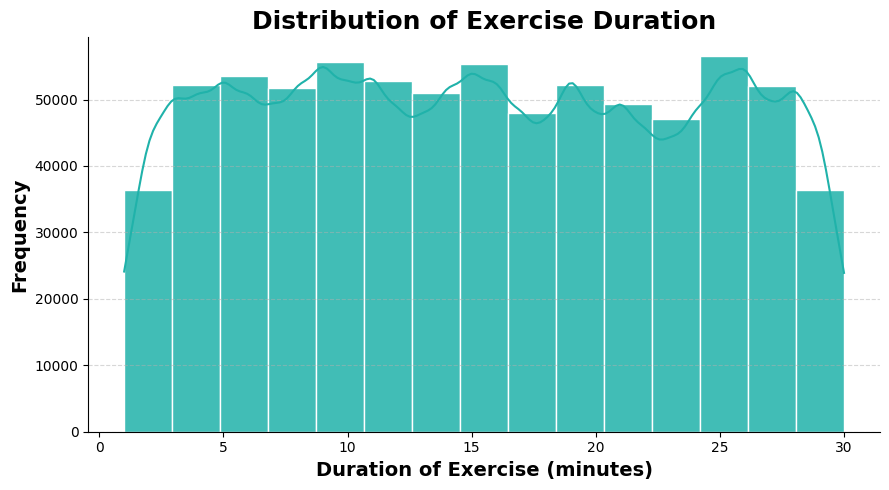

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

#FFA500
plt.figure(figsize=(9, 5))
sns.histplot(
    data=df,
    x='Duration',
    bins=15,                # Adjust bin count for detail
    color='#20B2AA',        # Teal color for freshness
    edgecolor='white',
    alpha=0.85,
    kde=True                # Adds KDE curve for smoothness
)

plt.title('Distribution of Exercise Duration', fontsize=18, fontweight='bold')
plt.xlabel('Duration of Exercise (minutes)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()


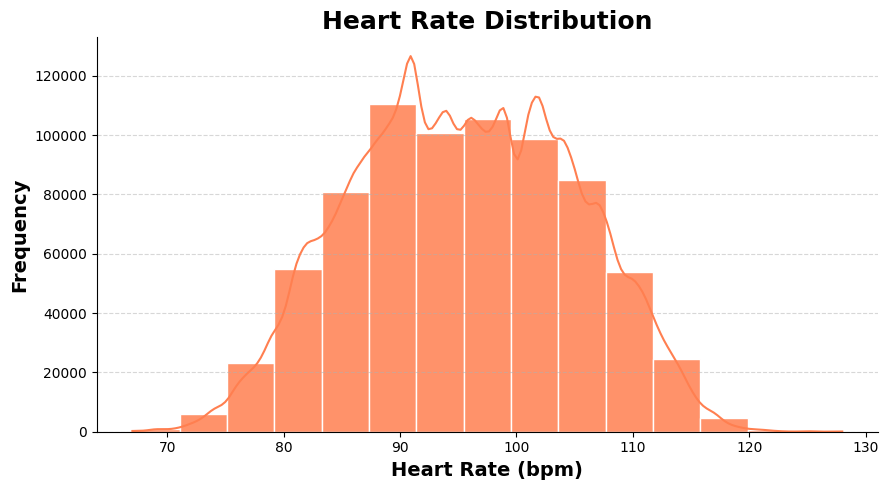

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.histplot(
    data=df,
    x='Heart_Rate',
    bins=15,                # Adjust bin count for detail
    color='#FF7F50',        # Coral color for distinction
    edgecolor='white',
    alpha=0.85,
    kde=True                # Adds KDE curve for smoothness
)

plt.title('Heart Rate Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Heart Rate (bpm)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()


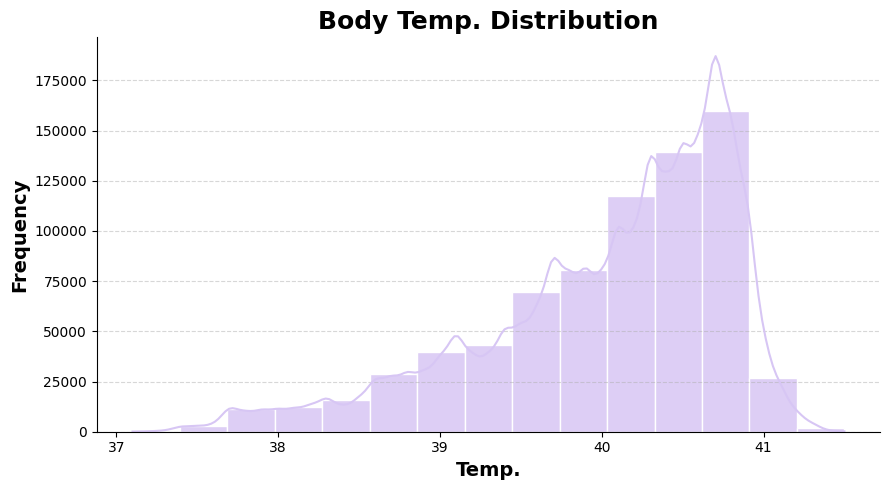

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.histplot(
    data=df,
    x='Body_Temp',
    bins=15,                # Adjust bin count for detail
    color='#D7C6F4',        # Coral color for distinction
    edgecolor='white',
    alpha=0.85,
    kde=True                # Adds KDE curve for smoothness
)

plt.title('Body Temp. Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Temp.', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()


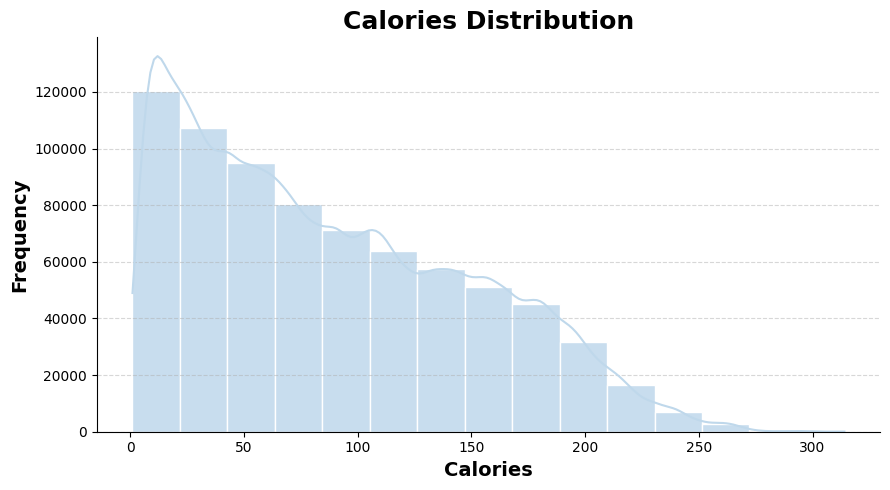

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.histplot(
    data=df,
    x='Calories',
    bins=15,                # Adjust bin count for detail
    color='#BFD8EB',        # Coral color for distinction
    edgecolor='white',
    alpha=0.85,
    kde=True                # Adds KDE curve for smoothness
)

plt.title('Calories Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Calories', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()


# 5. Bivariate Analysis

/tmp/ipykernel_89213/1347759537.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Sex", y="Calories", data=df, palette=["#E07A5F", "#3D405B"])


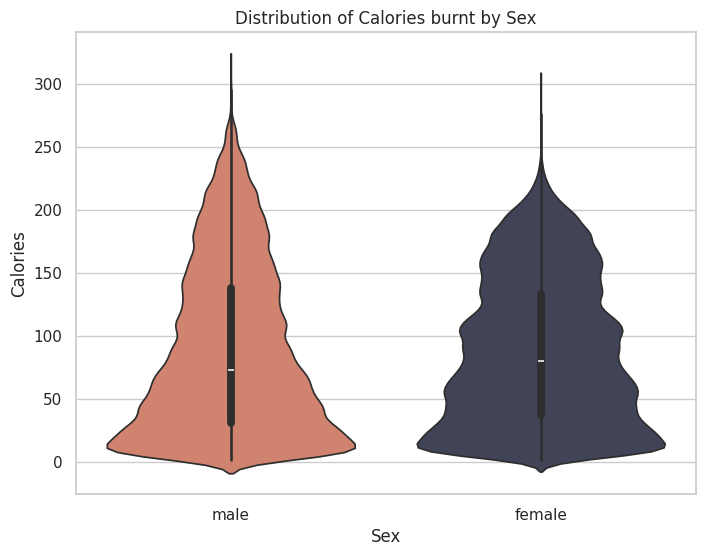

In [24]:
# Sex vs Calories
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.violinplot(x="Sex", y="Calories", data=df, palette=["#E07A5F", "#3D405B"])
plt.title("Distribution of Calories burnt by Sex")
plt.xlabel("Sex")
plt.ylabel("Calories")
plt.show()

Text(0, 0.5, 'Calories')

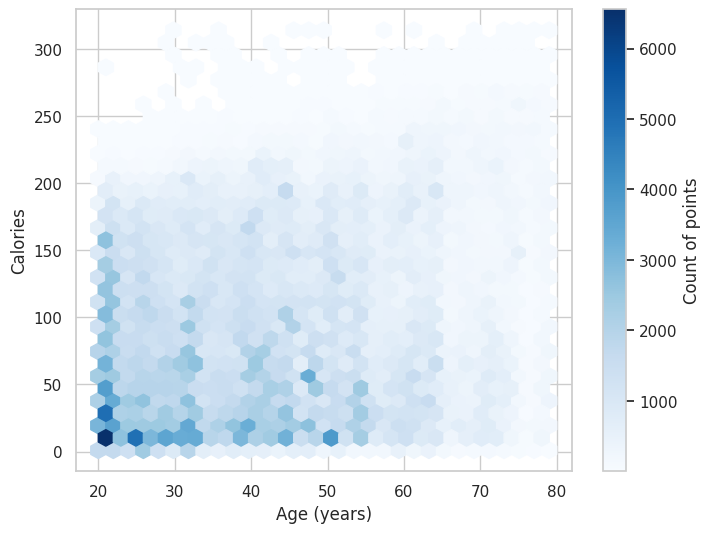

In [25]:
# Age vs Calories
plt.figure(figsize=(8,6))
plt.hexbin(df['Age'], df['Calories'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count of points')
plt.xlabel('Age (years)')
plt.ylabel('Calories')

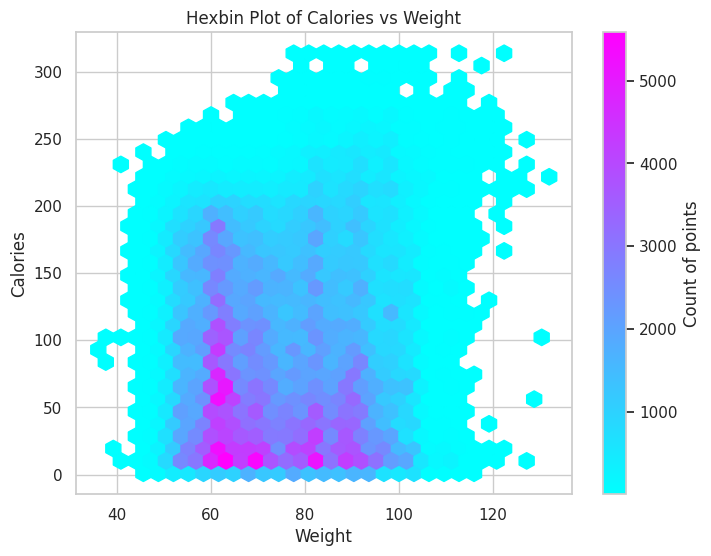

In [26]:
# weight vs calories
plt.figure(figsize=(8,6))
plt.hexbin(df['Weight'], df['Calories'], gridsize=30, cmap='cool', mincnt=1)
plt.colorbar(label='Count of points')
plt.xlabel('Weight')
plt.ylabel('Calories')
plt.title('Hexbin Plot of Calories vs Weight')
plt.show()


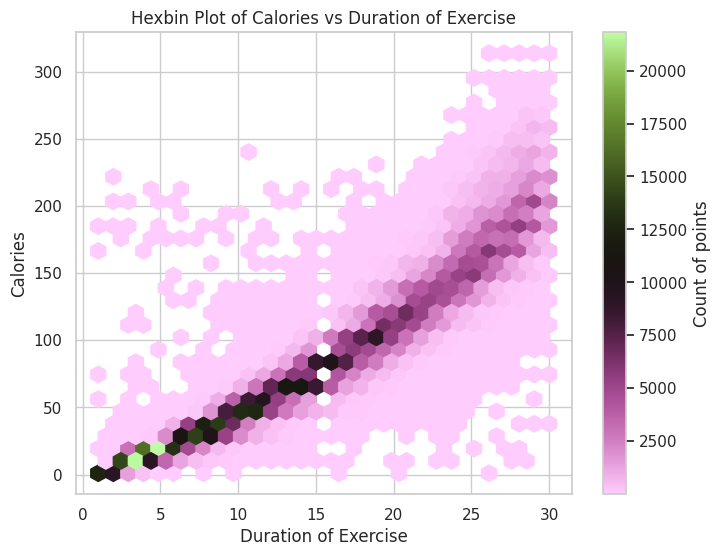

In [27]:
# Duration vs Calories
plt.figure(figsize=(8,6))
plt.hexbin(df['Duration'], df['Calories'], gridsize=30, cmap='vanimo', mincnt=1)
plt.colorbar(label='Count of points')
plt.xlabel('Duration of Exercise')
plt.ylabel('Calories')
plt.title('Hexbin Plot of Calories vs Duration of Exercise')
plt.show()


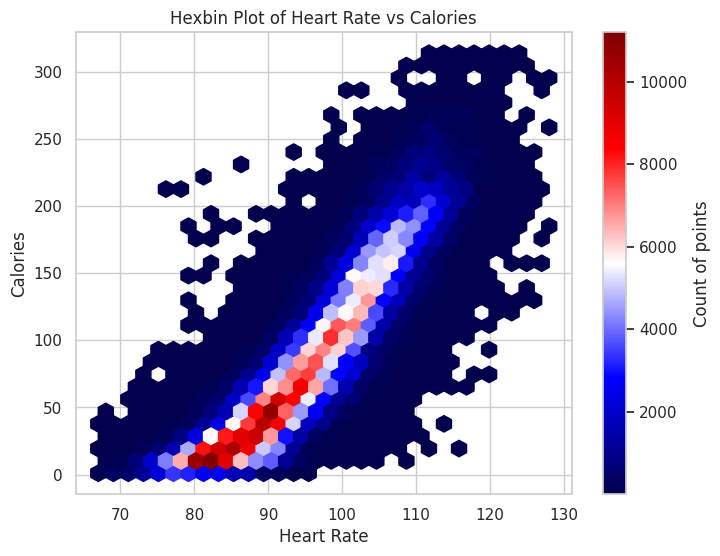

In [28]:
# Heart Rate vs Calories
plt.figure(figsize=(8,6))
plt.hexbin(df['Heart_Rate'], df['Calories'], gridsize=30, cmap='seismic', mincnt=1)
plt.colorbar(label='Count of points')
plt.xlabel('Heart Rate')
plt.ylabel('Calories')
plt.title('Hexbin Plot of Heart Rate vs Calories')
plt.show()


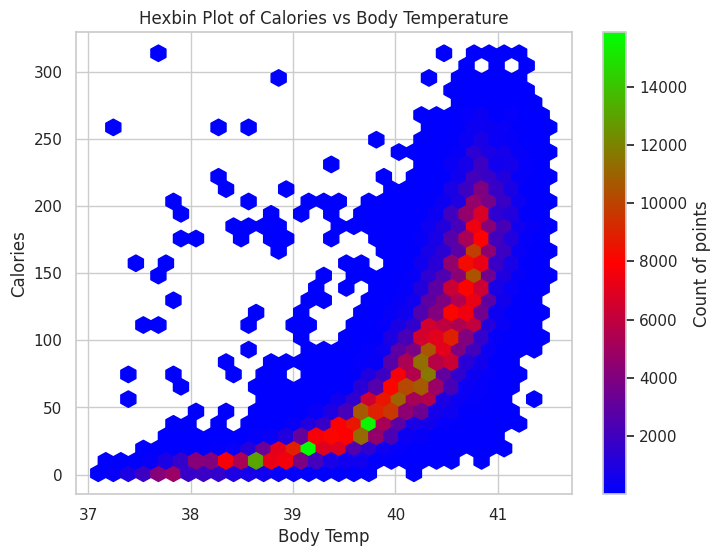

In [29]:
# Body Temp vs Calories
plt.figure(figsize=(8,6))
plt.hexbin(df['Body_Temp'], df['Calories'], gridsize=30, cmap='brg', mincnt=1)
plt.colorbar(label='Count of points')
plt.xlabel('Body Temp')
plt.ylabel('Calories')
plt.title('Hexbin Plot of Calories vs Body Temperature')
plt.show()

# 6. Machine Learning

#### 6.1 Importing necessary modules

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn import set_config
from sklearn.metrics import mean_squared_log_error

#### 6.2 Splitting the datasets into train and test

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop('Calories', axis=1)
y = df['Calories'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object', 'category']).columns.tolist()


#### 6.3 Linear Regression

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # leave numerical columns as-is
)

In [34]:
from sklearn.linear_model import LinearRegression

set_config(display='diagram')
# Full pipeline: Preprocessing + Model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_pred = np.maximum(0, y_pred)  # Ensure non-negativity for RMSLE

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"RMSLE: {rmsle:.4f}")

pipeline

RMSLE: 0.5652


/home/xero/vaibhav/myenv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex'])])),
                ('regressor', LinearRegression())])

#### Ridge Regression

In [35]:
from sklearn.linear_model import Ridge

from sklearn import set_config
set_config(display='diagram')


# Full pipeline: Preprocessing + Ridge Regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # You can tune alpha as needed
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_pred = np.maximum(0, y_pred)  # Ensure non-negativity for RMSLE

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"RMSLE: {rmsle:.4f}")

pipeline

RMSLE: 0.5652


/home/xero/vaibhav/myenv/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.55233e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/xero/vaibhav/myenv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex'])])),
                ('regressor', Ridge())])

In [36]:
from sklearn.linear_model import Lasso

# Show pipeline as a diagram (in Jupyter/Colab/VSCode Notebooks)
from sklearn import set_config
set_config(display='diagram')

# Define the pipeline with Lasso regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))  # Adjust alpha as needed
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_pred = np.maximum(0, y_pred)

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"RMSLE: {rmsle:.4f}")

# Display the pipeline diagram
pipeline


RMSLE: 0.5677


/home/xero/vaibhav/myenv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex'])])),
                ('regressor', Lasso(alpha=0.1))])

In [37]:
from sklearn.linear_model import ElasticNet
from sklearn import set_config

# Show the pipeline as a diagram (works in Jupyter/Colab/VSCode notebooks)
set_config(display='diagram')

# Define the pipeline with ElasticNet regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=0.1, l1_ratio=0.5))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_pred = np.maximum(0, y_pred)

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"RMSLE: {rmsle:.4f}")

# Display the pipeline diagram (only in supported environments)
pipeline


RMSLE: 0.5842


/home/xero/vaibhav/myenv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex'])])),
                ('regressor', ElasticNet(alpha=0.1))])

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import set_config

# Show the pipeline as a diagram (works in Jupyter/Colab/VSCode notebooks)
set_config(display='diagram')

# Define the pipeline with Decision Tree Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_pred = np.maximum(0, y_pred)

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"RMSLE: {rmsle:.4f}")

# Display the pipeline diagram (only in supported environments)
pipeline


RMSLE: 0.0859


/home/xero/vaibhav/myenv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import set_config

# Show the pipeline as a diagram (works in Jupyter/Colab/VSCode notebooks)
set_config(display='diagram')

# Define the pipeline with Random Forest Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=50,
        max_depth=10,
        n_jobs=-1,
        random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_pred = np.maximum(0, y_pred)

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"RMSLE: {rmsle:.4f}")

# Display the pipeline diagram (only in supported environments)
pipeline


RMSLE: 0.0797


/home/xero/vaibhav/myenv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1,
                                       random_state=42))])

In [42]:
from xgboost import XGBRegressor
from sklearn import set_config

# Show the pipeline as a diagram (works in Jupyter/Colab/VSCode notebooks)
set_config(display='diagram')

# Define the pipeline with XGBoost Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_pred = np.maximum(0, y_pred)

# Calculate RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"RMSLE: {rmsle:.4f}")

# Display the pipeline diagram (only in supported environments)
pipeline


RMSLE: 0.0688


/home/xero/vaibhav/myenv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eva...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [43]:
from lightgbm import LGBMRegressor
from sklearn import set_config

# Show pipeline diagram
set_config(display='diagram')

# Define pipeline with LightGBM
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Fit
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_pred = np.maximum(0, y_pred)

# RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"RMSLE: {rmsle:.4f}")

# Pipeline diagram
pipeline


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 9
[LightGBM] [Info] Start training from score 88.298465


/home/xero/vaibhav/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


RMSLE: 0.0684


/home/xero/vaibhav/myenv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex'])])),
                ('regressor', LGBMRegressor(random_state=42))])

In [44]:
from catboost import CatBoostRegressor
from sklearn import set_config

# Show pipeline diagram
set_config(display='diagram')

# Define pipeline with CatBoost
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(
        iterations=100,
        learning_rate=0.1,
        depth=6,
        verbose=0,
        random_state=42
    ))
])

# Fit
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_pred = np.maximum(0, y_pred)

# RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"RMSLE: {rmsle:.4f}")

# Pipeline diagram
pipeline


RMSLE: 0.0801


/home/xero/vaibhav/myenv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex'])])),
                ('regressor',
                 <catboost.core.CatBoostRegressor object at 0x72f6a458de80>)])

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import set_config

# Show pipeline diagram
set_config(display='diagram')

# Define pipeline with KNN
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

# Fit
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)
y_pred = np.maximum(0, y_pred)

# RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(f"RMSLE: {rmsle:.4f}")

# Pipeline diagram
pipeline


RMSLE: 0.6252


/home/xero/vaibhav/myenv/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex'])])),
                ('regressor', KNeighborsRegressor())])